### Imp Features 0.025 %

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from datetime import datetime
import dateutil
from pandas import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

In [3]:
csv_files = os.chdir('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD Models\\Weather_Features')
weather_features = pd.read_csv('weatherData_full.csv', encoding='latin 1')
holidays_features = pd.read_csv('holidays_features.csv')
economic_features = pd.read_csv('economic_features.csv')
womenClothing_sales = pd.read_csv('womenClothing_sales.csv')

In [4]:
print('womenClothing :', womenClothing_sales.shape)
print('holidays_features :', holidays_features.shape)
print('economic_features :', economic_features.shape)
print('weather_features :', weather_features.shape)

womenClothing : (84, 3)
holidays_features : (81, 6)
economic_features : (96, 18)
weather_features : (96, 83)


## Seperate Train and Test Data

### Test Data

In [5]:
weather_features_test = weather_features[weather_features['Year'] == 2016]
holidays_features_test = holidays_features[holidays_features['Year'] == 2016]
economic_features_test = economic_features[economic_features['Year'] == 2016]

In [6]:
print('holidays_features :', holidays_features_test.shape)
print('economic_features :', economic_features_test.shape)
print('weather_features :', weather_features_test.shape)

holidays_features : (11, 6)
economic_features : (12, 18)
weather_features : (12, 83)


In [7]:
test_data = weather_features_test.merge(holidays_features_test, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
test_data = test_data.merge(economic_features_test, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')

In [8]:
test_data.tail()

,Year,Month,Temp high (°C)min,Temp high (°C)max,Temp high (°C)mean,Temp high (°C)var,Temp avg (°C)min,Temp avg (°C)max,Temp avg (°C)mean,Temp avg (°C)var,...,Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
7,2016,5,11.0,33.0,21.258065,45.197849,9.0,28.0,17.193548,31.894624,...,25.68,0.0,70.28,0.73,8.422,7.920,755,12.455,3.275,8.50
8,2016,6,19.0,31.0,27.100000,11.127586,16.0,27.0,22.433333,6.322989,...,25.42,0.0,74.10,0.73,9.347,8.588,792,12.165,3.275,9.95
9,2016,7,22.0,36.0,30.129032,11.449462,21.0,31.0,26.064516,6.662366,...,25.53,0.0,79.50,0.73,9.824,9.104,802,15.215,3.275,10.95
10,2016,8,26.0,36.0,30.354839,6.169892,22.0,32.0,26.354839,5.303226,...,25.52,0.0,79.50,0.00,9.824,9.340,787,15.314,3.275,10.95
11,2016,9,15.0,33.0,26.166667,19.040230,14.0,28.0,22.133333,12.809195,...,25.74,0.0,77.86,0.00,9.950,9.464,790,15.580,3.275,10.95


In [9]:
test_data.isnull().sum()

Year                                                                 0
Month                                                                0
Temp high (°C)min                                                    0
Temp high (°C)max                                                    0
Temp high (°C)mean                                                   0
Temp high (°C)var                                                    0
Temp avg (°C)min                                                     0
Temp avg (°C)max                                                     0
Temp avg (°C)mean                                                    0
Temp avg (°C)var                                                     0
Temp low (°C)min                                                     0
Temp low (°C)max                                                     0
Temp low (°C)mean                                                    0
Temp low (°C)var                                                     0
Dew Po

### Train Data

In [10]:
weather_features_train = weather_features[weather_features['Year'] != 2016]
holidays_features_train = holidays_features[holidays_features['Year'] != 2016]
economic_features_train = economic_features[economic_features['Year'] != 2016]

In [11]:
print('holidays_features :', holidays_features_train.shape)
print('economic_features :', economic_features_train.shape)
print('weather_features :', weather_features_train.shape)

holidays_features : (70, 6)
economic_features : (84, 18)
weather_features : (84, 83)


In [12]:
train_data = womenClothing_sales.merge(holidays_features_train, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
train_data = train_data.merge(economic_features_train, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
train_data = train_data.merge(weather_features_train, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')

In [13]:
train_data.head()

,Year,Month,WomenClothing_Sales,Event,Federal Holiday,Event_Yes_No,Federal Holiday_Yes_No,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,...,Wind (km/h) highvar,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Other,Rain,"Rain , Snow",Snow,Thunderstorm
0,2009,1,1755.0,0.0,2.0,No,Yes,14421.752895,14407.053343,233.402,...,96.625806,0,0,2,2,21,3,0,3,0
1,2009,2,1729.0,1.0,1.0,Yes,Yes,14389.200466,14366.176571,234.663,...,167.349206,0,0,0,1,22,4,1,0,0
2,2009,3,2256.0,NaN,NaN,NaN,NaN,14340.701639,14351.786822,235.067,...,92.245161,1,0,0,2,21,7,0,0,0
3,2009,4,2662.0,1.0,0.0,Yes,No,14326.815525,14351.601731,235.582,...,87.426437,0,1,0,0,18,11,0,0,0
4,2009,5,2732.0,1.0,1.0,Yes,Yes,14345.904809,14368.123959,235.975,...,88.874886,0,4,0,0,17,10,0,0,0


In [14]:
train_data.shape

(84, 104)

In [15]:
train_data.isnull().sum()

Year                                                                  0
Month                                                                 0
WomenClothing_Sales                                                   0
Event                                                                14
Federal Holiday                                                      14
Event_Yes_No                                                         14
Federal Holiday_Yes_No                                               14
Monthly Nominal GDP Index (inMillion$)                                0
Monthly Real GDP Index (inMillion$)                                   0
CPI                                                                   0
unemployment rate                                                     0
CommercialBankInterestRateonCreditCardPlans                           0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan     0
Earnings or wages  in dollars per hour                          

In [16]:
# train_data['new_col'] = train_data['Month'].apply(lambda x: 1 if x==12 else 0)
# test_data['new_col'] = test_data['Month'].apply(lambda x: 1 if x==12 else 0)


### Drop Columns

In [16]:
X = train_data.copy().drop(['WomenClothing_Sales','Event_Yes_No', 'Federal Holiday_Yes_No'], axis = 1)
Y = train_data['WomenClothing_Sales']
Y1 = train_data['Year']

### Fill Missing Values

In [29]:
X = X.fillna(0)
test_data = test_data.fillna(0)

## Models

### Train Val Split

In [30]:
trainX_fold, valX_fold, trainY_fold, valY_fold =  train_test_split(X, Y1, test_size=0.25, random_state=42, shuffle=False)
y_train, y_val = Y.loc[trainY_fold.index], Y.loc[valY_fold.index]

In [31]:
print(trainX_fold.shape)
type(y_train)

(63, 101)


pandas.core.series.Series

### MAPE Function

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Light GBM

In [33]:
def run_lgb(train_X, train_y, val_X, val_y):
    param = {'num_leaves': 30,
#              'min_data_in_leaf': 100,
             'objective': 'regression',
             'max_depth': 8,
             'learning_rate': 0.01,
             "boosting": "gbdt",
             "feature_fraction": 0.7,
             "bagging_freq": 1,
             "bagging_fraction": 0.7,
             "bagging_seed": 11,
             "metric": 'mape',
             # "lambda_l1": 0.2634,
             "random_state": 133,
             "verbosity": -1}

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(param, lgtrain, 2000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100,
                      evals_result=evals_result)
    return model, evals_result


In [34]:
model, evals_result = run_lgb(trainX_fold, y_train, valX_fold, y_val)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's mape: 0.195624
[200]	valid_0's mape: 0.181742
[300]	valid_0's mape: 0.175896
[400]	valid_0's mape: 0.170129
[500]	valid_0's mape: 0.167004
[600]	valid_0's mape: 0.162919
[700]	valid_0's mape: 0.161281
[800]	valid_0's mape: 0.159466
[900]	valid_0's mape: 0.157624
[1000]	valid_0's mape: 0.158465
Early stopping, best iteration is:
[968]	valid_0's mape: 0.157335


### Predict On Test

In [35]:
test_data = test_data.drop(['Event_Yes_No', 'Federal Holiday_Yes_No'], axis=1)

ValueError: labels ['Event_Yes_No' 'Federal Holiday_Yes_No'] not contained in axis

In [36]:
model.predict(test_data)

array([2402.33592895, 2992.96830379, 2998.30310342, 2762.06962791,
       2402.33592895, 2632.1218568 , 2595.92314856, 2779.97998235,
       3019.31766963, 3161.78041328, 3232.59558709, 3121.02598789])

In [37]:
test_results = pd.DataFrame({'Sales(In ThousandDollars)': model.predict(test_data)})

In [38]:
test_results

,Sales(In ThousandDollars)
0,2402.335929
1,2992.968304
2,2998.303103
3,2762.069628
4,2402.335929
5,2632.121857
6,2595.923149
7,2779.979982
8,3019.317670
9,3161.780413


In [39]:
submission = pd.read_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\NewSampleSubmission.csv')
submission.head()

,ID,Sales(In ThousandDollars),Year,Month,ProductCategory
0,1,110,2016,1,WomenClothing
1,2,140,2016,2,WomenClothing
2,3,199,2016,3,WomenClothing
3,4,246,2016,4,WomenClothing
4,5,66,2016,5,WomenClothing


In [40]:
submission['Sales(In ThousandDollars)'] = test_results['Sales(In ThousandDollars)']

In [41]:
submission

,ID,Sales(In ThousandDollars),Year,Month,ProductCategory
0,1,2402.335929,2016,1,WomenClothing
1,2,2992.968304,2016,2,WomenClothing
2,3,2998.303103,2016,3,WomenClothing
3,4,2762.069628,2016,4,WomenClothing
4,5,2402.335929,2016,5,WomenClothing
5,6,2632.121857,2016,6,WomenClothing
6,7,2595.923149,2016,7,WomenClothing
7,8,2779.979982,2016,8,WomenClothing
8,9,3019.317670,2016,9,WomenClothing
9,10,3161.780413,2016,10,WomenClothing


In [42]:
#submission.to_csv('C:\\Users\\HP\\Desktop\\trial\\regression_lgbm_submission.csv', index=False)

In [43]:
############################# ---------------------------------------------------------- #################################

## Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=3,
                                   max_features='sqrt', max_leaf_nodes=None,
                                   min_samples_leaf=2, min_samples_split=3, n_estimators=20, n_jobs=1,)

rf_model.fit(trainX_fold , y_train)

y_pred = rf_model.predict(valX_fold)
mean_absolute_percentage_error(y_val, y_pred)

17.810107183467338

### Take Imp_Features

In [45]:
X_cols = trainX_fold.columns
feature_imp_RFC = pd.DataFrame({"imp_features":rf_model.feature_importances_, "columns":X_cols})
feature_imp_RFC.sort_values(by = 'imp_features', ascending=False)

,columns,imp_features
6,CPI,0.131095
1,Month,0.090016
0,Year,0.084766
4,Monthly Nominal GDP Index (inMillion$),0.070590
2,Event,0.047340
5,Monthly Real GDP Index (inMillion$),0.046568
8,CommercialBankInterestRateonCreditCardPlans,0.044878
66,Sea Level Press lowmean,0.036412
46,Humidity_highmean,0.029566
10,Earnings or wages in dollars per hour,0.025522


In [46]:
top_features = feature_imp_RFC[feature_imp_RFC['imp_features'] >= 0.025]
top_features.head()

,columns,imp_features
0,Year,0.084766
1,Month,0.090016
2,Event,0.047340
4,Monthly Nominal GDP Index (inMillion$),0.070590
5,Monthly Real GDP Index (inMillion$),0.046568


In [47]:
top_features.shape

(10, 2)

#### Selecting Imp Features From RF

In [48]:
imp_columns_train = pd.DataFrame()
for i in top_features['columns'].values:
    imp_columns_train[i] = trainX_fold[i]
    
imp_columns_train.head()

,Year,Month,Event,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,CommercialBankInterestRateonCreditCardPlans,Earnings or wages in dollars per hour,Humidity_highmean,Sea Level Press lowmean
0,2009,1,0.0,14421.752895,14407.053343,233.402,12.03,22.05,71.774194,1010.516129
1,2009,2,1.0,14389.200466,14366.176571,234.663,12.97,22.22,69.535714,1012.464286
2,2009,3,0.0,14340.701639,14351.786822,235.067,12.97,22.22,74.096774,1017.032258
3,2009,4,1.0,14326.815525,14351.601731,235.582,12.97,22.13,75.466667,1010.433333
4,2009,5,1.0,14345.904809,14368.123959,235.975,13.32,22.04,85.645161,1014.129032


In [49]:
imp_columns_val = pd.DataFrame()

for i in top_features['columns'].values:
    imp_columns_val[i] = valX_fold[i]

imp_columns_val.head()

,Year,Month,Event,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,CommercialBankInterestRateonCreditCardPlans,Earnings or wages in dollars per hour,Humidity_highmean,Sea Level Press lowmean
63,2014,4,2.0,17208.864684,15870.178053,259.985,11.83,24.40,73.100000,1012.766667
64,2014,5,1.0,17345.334028,15946.741336,261.225,11.83,24.30,76.354839,1013.354839
65,2014,6,1.0,17408.564289,15990.977418,261.350,11.83,24.42,80.233333,1013.266667
66,2014,7,0.0,17551.781065,16089.499187,261.498,11.83,24.31,80.451613,1012.258065
67,2014,8,0.0,17684.635349,16196.420132,261.075,11.82,24.32,78.354839,1014.741935


### train Model with Imp_Features

In [50]:
rf_model.fit(imp_columns_train, y_train)
y_pred1 = rf_model.predict(imp_columns_val)

mean_absolute_percentage_error(y_val, y_pred1)

13.72012650041842

### Predict Test Data

In [51]:
imp_columns_test = pd.DataFrame()

for i in top_features['columns'].values:
    imp_columns_test[i] = test_data[i]

imp_columns_test.head()

,Year,Month,Event,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,CommercialBankInterestRateonCreditCardPlans,Earnings or wages in dollars per hour,Humidity_highmean,Sea Level Press lowmean
0,2016,1,0.0,18286.638523,16546.153123,260.342,12.22,25.50,64.258065,1011.000000
1,2016,10,1.0,18740.780023,16725.460098,264.738,12.51,26.04,84.000000,1015.838710
2,2016,11,1.0,18960.461568,16910.896330,265.203,12.41,25.87,73.100000,1013.600000
3,2016,12,2.0,19015.393408,16918.050624,265.421,12.41,25.90,73.193548,1014.548387
4,2016,2,1.0,18241.713812,16503.500358,260.875,12.31,25.49,70.793103,1010.379310


In [52]:
rf_model.predict(imp_columns_test)

array([3460.965625, 3615.140625, 3531.790625, 4348.775   , 3566.690625,
       3566.690625, 3566.690625, 3565.80625 , 3565.80625 , 3548.05625 ,
       3554.440625, 3615.140625])

In [53]:
test_predictions = pd.DataFrame({'Sales(In ThousandDollars)': rf_model.predict(imp_columns_test)})
test_predictions.head(2)

,Sales(In ThousandDollars)
0,3460.965625
1,3615.140625


In [54]:
submissionfile = pd.read_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\NewSampleSubmission.csv')
submissionfile.head(2)

,ID,Sales(In ThousandDollars),Year,Month,ProductCategory
0,1,110,2016,1,WomenClothing
1,2,140,2016,2,WomenClothing


In [55]:
submissionfile['Sales(In ThousandDollars)'] = test_predictions['Sales(In ThousandDollars)']
submissionfile

,ID,Sales(In ThousandDollars),Year,Month,ProductCategory
0,1,3460.965625,2016,1,WomenClothing
1,2,3615.140625,2016,2,WomenClothing
2,3,3531.790625,2016,3,WomenClothing
3,4,4348.775000,2016,4,WomenClothing
4,5,3566.690625,2016,5,WomenClothing
5,6,3566.690625,2016,6,WomenClothing
6,7,3566.690625,2016,7,WomenClothing
7,8,3565.806250,2016,8,WomenClothing
8,9,3565.806250,2016,9,WomenClothing
9,10,3548.056250,2016,10,WomenClothing


In [56]:
#submissionfile.to_csv('C:\\Users\\HP\\Desktop\\trial\\regression_rf_submission.csv', index=False)

### RF Tuning

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 8, 10, 12],
    'max_features': ['sqrt', 'log2', 'auto'],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [3, 5, 8, 10, 12],
    'n_estimators': [20, 30, 40, 50]
}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)
rf_grid.fit(trainX_fold, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [3, 5, 8, 10, 12], 'max_features': ['sqrt', 'log2', 'auto'], 'min_samples_leaf': [2, 3, 4, 5], 'min_samples_split': [3, 5, 8, 10, 12], 'n_estimators': [20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 40}

### Build RF Model With Best Parameters

In [59]:
rf_model_best = RandomForestRegressor(bootstrap=True, max_depth=5, max_features='auto', min_samples_leaf=2, 
                                     min_samples_split=8, n_estimators=40)

rf_model_best.fit(imp_columns_train, y_train)
preds = rf_model_best.predict(imp_columns_val)
mean_absolute_percentage_error(y_val, preds)

11.127155310718011

In [61]:
test_preds_rf = pd.DataFrame({'Sales(In ThousandDollars)': rf_model_best.predict(imp_columns_test)})
test_preds_rf

,Sales(In ThousandDollars)
0,3114.083819
1,3713.977354
2,3743.799729
3,4442.735031
4,3330.055015
5,3768.844873
6,3798.944170
7,3689.220909
8,3610.488351
9,3596.021374


In [62]:
submissionfile['Sales(In ThousandDollars)'] = test_preds_rf['Sales(In ThousandDollars)']
submissionfile

,ID,Sales(In ThousandDollars),Year,Month,ProductCategory
0,1,3114.083819,2016,1,WomenClothing
1,2,3713.977354,2016,2,WomenClothing
2,3,3743.799729,2016,3,WomenClothing
3,4,4442.735031,2016,4,WomenClothing
4,5,3330.055015,2016,5,WomenClothing
5,6,3768.844873,2016,6,WomenClothing
6,7,3798.944170,2016,7,WomenClothing
7,8,3689.220909,2016,8,WomenClothing
8,9,3610.488351,2016,9,WomenClothing
9,10,3596.021374,2016,10,WomenClothing


In [52]:
#submissionfile.to_csv('C:\\Users\\HP\\Desktop\\trial\\regression_rf_best_submission.csv', index=False)

In [64]:
##################################################################################################################

### GBM

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor()
model_gbr.fit(trainX_fold, y_train)

val_predictions = model_gbr.predict(valX_fold)
mean_absolute_percentage_error(y_val, val_predictions)

14.435404446789066

In [64]:
test_preds = pd.DataFrame({'Sales(In ThousandDollars)': model_gbr.predict(test_data)})
test_preds

,Sales(In ThousandDollars)
0,2407.081622
1,2942.114933
2,2904.340265
3,2589.262319
4,2407.081622
5,2834.662310
6,2811.560897
7,2887.434636
8,2913.900793
9,2946.414668


### GBM With rf_model Imp_features

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor()
model_gbr.fit(imp_columns_train, y_train)

val_predictions = model_gbr.predict(imp_columns_val)
mean_absolute_percentage_error(y_val, val_predictions)

8.182636252320822

In [66]:
test_preds1 = pd.DataFrame({'Sales(In ThousandDollars)': model_gbr.predict(imp_columns_test)})

In [67]:
submissionfile['Sales(In ThousandDollars)'] = test_preds1['Sales(In ThousandDollars)']
submissionfile

,ID,Sales(In ThousandDollars),Year,Month,ProductCategory
0,1,3267.131498,2016,1,WomenClothing
1,2,4013.631838,2016,2,WomenClothing
2,3,4027.413783,2016,3,WomenClothing
3,4,4847.988924,2016,4,WomenClothing
4,5,3541.047898,2016,5,WomenClothing
5,6,4197.733296,2016,6,WomenClothing
6,7,4224.487081,2016,7,WomenClothing
7,8,4112.699155,2016,8,WomenClothing
8,9,3888.884729,2016,9,WomenClothing
9,10,3823.004196,2016,10,WomenClothing


In [70]:
#submissionfile.to_csv('C:\\Users\\HP\\Desktop\\trial\\regression_gbm_submission.csv', index=False)

### GBM With GridSearch

In [68]:
parameters = {
    "criterion": ["friedman_mse",'mae'],
    "loss":['ls', 'lad', 'huber', 'quantile'],
    "learning_rate": [0.025, 0.05, 0.075, 0.1, 0.15],
    "max_depth":[3,5,8],
    "n_estimators":[10, 15, 20],
    "min_samples_split":[2,3,4,5,6]
    }

gbc = GradientBoostingRegressor()
gbc_grid = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1)
gbc_grid.fit(imp_columns_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['friedman_mse', 'mae'], 'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.025, 0.05, 0.075, 0.1, 0.15], 'max_depth': [3, 5, 8], 'n_estimators': [10, 15, 20], 'min_samples_split': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
gbc_grid.best_params_

{'criterion': 'mae',
 'learning_rate': 0.15,
 'loss': 'huber',
 'max_depth': 8,
 'min_samples_split': 5,
 'n_estimators': 15}

In [70]:
gbc_best = GradientBoostingRegressor(criterion='mae',
                                        learning_rate = 0.15,
                                        loss = 'huber',
                                        max_depth = 8,
                                        min_samples_split = 5,
                                        n_estimators =15)
gbc_best.fit(imp_columns_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
             learning_rate=0.15, loss='huber', max_depth=8,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=15,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [71]:
y_cap = gbc_best.predict(imp_columns_val)
mean_absolute_percentage_error(y_val, y_cap)

9.325662790293539

In [72]:
gbc_best.predict(imp_columns_test)

array([3194.81479139, 3535.72726503, 3858.79259581, 4632.60325662,
       3614.71252277, 3873.8615517 , 3873.8615517 , 3866.93696496,
       3860.06018979, 3856.27705406, 3833.74683707, 3904.45180077])

In [73]:
test_preds2 = pd.DataFrame({'Sales(In ThousandDollars)': gbc_best.predict(imp_columns_test)})
test_preds2

,Sales(In ThousandDollars)
0,3194.814791
1,3535.727265
2,3858.792596
3,4632.603257
4,3614.712523
5,3873.861552
6,3873.861552
7,3866.936965
8,3860.060190
9,3856.277054


In [74]:
submissionfile['Sales(In ThousandDollars)'] = test_preds2['Sales(In ThousandDollars)']
submissionfile

,ID,Sales(In ThousandDollars),Year,Month,ProductCategory
0,1,3194.814791,2016,1,WomenClothing
1,2,3535.727265,2016,2,WomenClothing
2,3,3858.792596,2016,3,WomenClothing
3,4,4632.603257,2016,4,WomenClothing
4,5,3614.712523,2016,5,WomenClothing
5,6,3873.861552,2016,6,WomenClothing
6,7,3873.861552,2016,7,WomenClothing
7,8,3866.936965,2016,8,WomenClothing
8,9,3860.060190,2016,9,WomenClothing
9,10,3856.277054,2016,10,WomenClothing


In [85]:
#submissionfile.to_csv('C:\\Users\\HP\Desktop\\trial\\regression_gbm_best_submission.csv', index=False)

### Linear Regression

In [77]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.1)

reg_lasso.fit(trainX_fold, y_train)
Y_cap  = reg_lasso.predict(valX_fold)

mean_absolute_percentage_error(y_val, Y_cap)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


27.418520794265227

In [79]:
test_preds_reg = pd.DataFrame({'Sales(In ThousandDollars)':reg_lasso.predict(test_data)})
test_preds_reg

,Sales(In ThousandDollars)
0,-3.047104e+06
1,-3.055305e+06
2,-3.092860e+06
3,-3.096222e+06
4,-3.017411e+06
5,-3.055895e+06
6,-3.052783e+06
7,-3.029324e+06
8,-3.045857e+06
9,-3.046832e+06


### Linear Regression With Imp Features

In [78]:
reg_lasso_imp = linear_model.Lasso(alpha=0.1)

reg_lasso_imp.fit(imp_columns_train, y_train)
Y_cap1  = reg_lasso_imp.predict(imp_columns_val)

mean_absolute_percentage_error(y_val, Y_cap1)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


8.742099214811859

In [80]:
test_preds_reg_imp = pd.DataFrame({'Sales(In ThousandDollars)':reg_lasso_imp.predict(imp_columns_test)})
test_preds_reg_imp

,Sales(In ThousandDollars)
0,3072.734828
1,3979.464977
2,4455.937039
3,4951.399108
4,3432.931099
5,3654.406763
6,3842.321470
7,3701.440007
8,3869.377631
9,3320.625224


In [84]:
lr_model = linear_model.Lasso(alpha=[0.1])
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

reg_grid = GridSearchCV(lr_model, parameters, cv=5)
reg_grid.fit(imp_columns_train, y_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=[0.1], copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
reg_grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [86]:
reg_lasso_best = linear_model.Lasso(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True)

reg_lasso_best.fit(imp_columns_train, y_train)
Y_cap2  = reg_lasso_best.predict(imp_columns_val)

mean_absolute_percentage_error(y_val, Y_cap2)

7.788364402027863

In [87]:
test_preds_reg_best = pd.DataFrame({'Sales(In ThousandDollars)':reg_lasso_best.predict(imp_columns_test)})
test_preds_reg_best

,Sales(In ThousandDollars)
0,3266.763097
1,4241.797641
2,4678.211664
3,5186.586762
4,3635.028531
5,3840.992263
6,4026.138522
7,3907.553925
8,4089.017243
9,3565.048256


In [ ]:
######################################################

### RF Model

In [97]:
sale = pd.read_excel('C:\\Users\\HP\\Desktop\\sales.xlsx', sheetname='rf_model', parse_dates=['YM'])
sale.head()

,Year,Month,WomenClothing_Sales,YM
0.0,2009,1,1755.0,2009-01-01
1.0,2009,2,1729.0,2009-02-01
2.0,2009,3,2256.0,2009-03-01
3.0,2009,4,2662.0,2009-04-01
4.0,2009,5,2732.0,2009-05-01


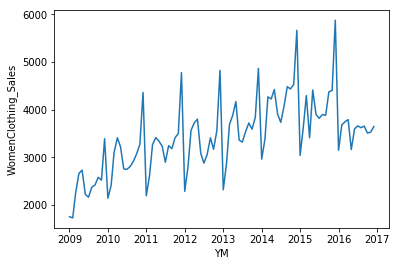

In [99]:
sns.lineplot(y = 'WomenClothing_Sales', x='YM', data=sale)
plt.show()

### GBM

In [100]:
sale = pd.read_excel('C:\\Users\\HP\\Desktop\\sales.xlsx', sheetname='gbm', parse_dates=['YM'])
sale.head()

,Year,Month,WomenClothing_Sales,YM
0.0,2009,1,1755.0,2009-01-01
1.0,2009,2,1729.0,2009-02-01
2.0,2009,3,2256.0,2009-03-01
3.0,2009,4,2662.0,2009-04-01
4.0,2009,5,2732.0,2009-05-01


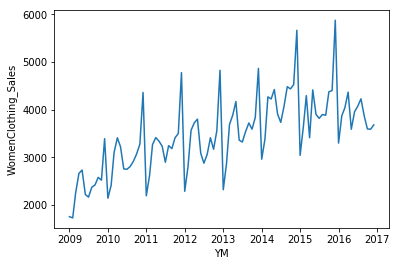

In [101]:
sns.lineplot(y = 'WomenClothing_Sales', x='YM', data=sale)
plt.show()

### GBM Tuned

In [102]:
sale = pd.read_excel('C:\\Users\\HP\\Desktop\\sales.xlsx', sheetname='gbm tune', parse_dates=['YM'])
sale.head()

,Year,Month,WomenClothing_Sales,YM
0.0,2009,1,1755.0,2009-01-01
1.0,2009,2,1729.0,2009-02-01
2.0,2009,3,2256.0,2009-03-01
3.0,2009,4,2662.0,2009-04-01
4.0,2009,5,2732.0,2009-05-01


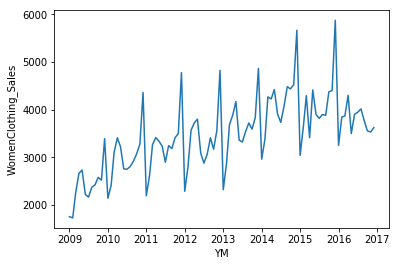

In [103]:
sns.lineplot(y = 'WomenClothing_Sales', x='YM', data=sale)
plt.show()